![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [181]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Start coding!
netflix_df = pd.read_csv('netflix_data.csv')

netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [182]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [183]:
netflix_df['genre'].unique()

array(['International TV', 'Dramas', 'Horror Movies', 'Action',
       'Crime TV', 'Documentaries', 'Independent Movies', 'Comedies',
       'Sports Movies', 'Anime Series', 'Reality TV', 'TV Comedies',
       'Docuseries', 'Uncategorized', 'British TV',
       'International Movies', 'Sci-Fi', 'Kids', 'Children', 'TV Shows',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'TV Dramas', 'TV Horror', 'TV Action', 'Classic',
       'Romantic TV', 'Cult Movies', 'TV Sci', 'Romantic Movies',
       'Spanish-Language', 'LGBTQ Movies'], dtype=object)

In [184]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [185]:
netflix_df.value_counts().sum()

4812

In [186]:
netflix_subset = netflix_df[netflix_df['type']=='Movie']

In [187]:
netflix_subset.value_counts().sum()

4677

In [188]:
netflix_subset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [189]:
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]

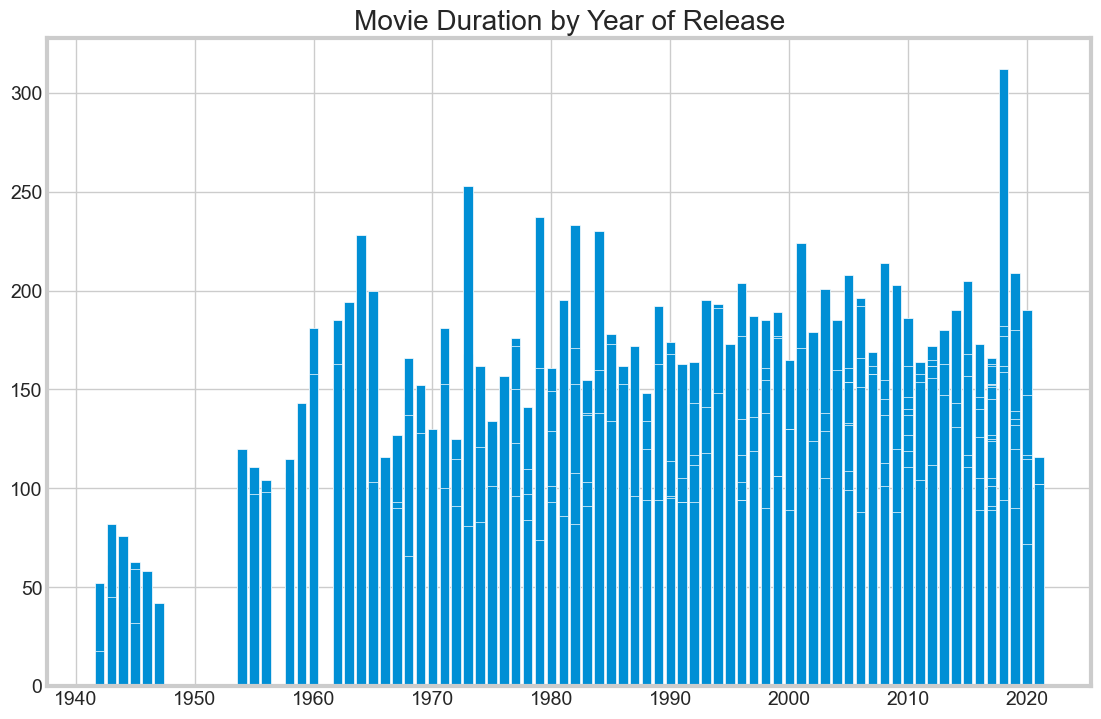

In [190]:
fig = plt.figure(figsize=(12,8))

plt.bar(netflix_movies['release_year'],netflix_movies['duration'])
plt.title("Movie Duration by Year of Release")
plt.show()

In [191]:
short_movies=netflix_movies[netflix_movies['duration']<60]
short_movies.head(5)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


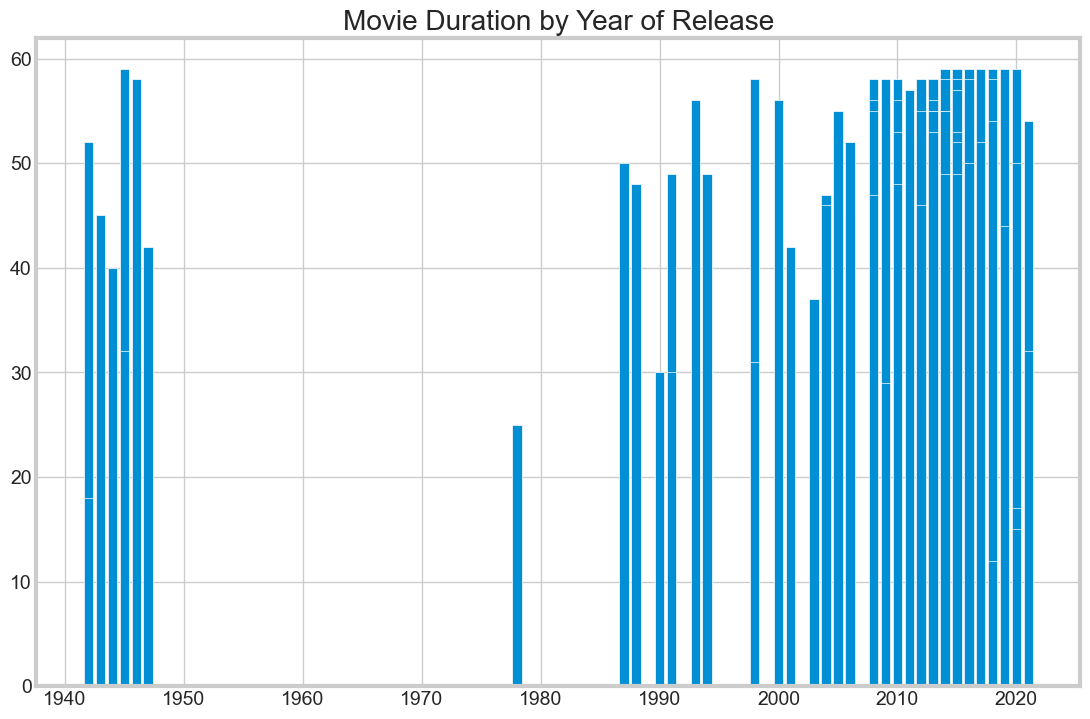

In [192]:
fig = plt.figure(figsize=(12,8))

plt.bar(short_movies['release_year'],short_movies['duration'])
plt.title("Movie Duration by Year of Release")
plt.show()

In [193]:
short_movies['release_year'].unique()

array([2016, 2014, 2017, 2018, 2019, 2020, 2015, 2011, 2012, 2013, 1994,
       1978, 1991, 1993, 2021, 2008, 2005, 2006, 2001, 2009, 2010, 2003,
       1946, 2000, 1998, 1945, 1988, 1942, 1987, 2004, 1944, 1947, 1990,
       1943])

In [194]:
short_movies['genre'].unique()

array(['Documentaries', 'Uncategorized', 'Children', 'Stand-Up',
       'Comedies', 'Dramas', 'International Movies', 'Action', 'Music',
       'Classic Movies', 'Anime Features', 'Horror Movies'], dtype=object)

In [195]:
colors = []

for index, row in short_movies.iterrows() :
    genre = row['genre']
    if genre== 'Children' :
        colors.append('red')
    elif genre== 'Documentaries' :
        colors.append('blue')
    elif genre== 'Stand-Up' :
        colors.append('green')
    else:
        colors.append('black')
              
print(colors[:10])

['blue', 'black', 'black', 'blue', 'blue', 'black', 'black', 'red', 'red', 'red']


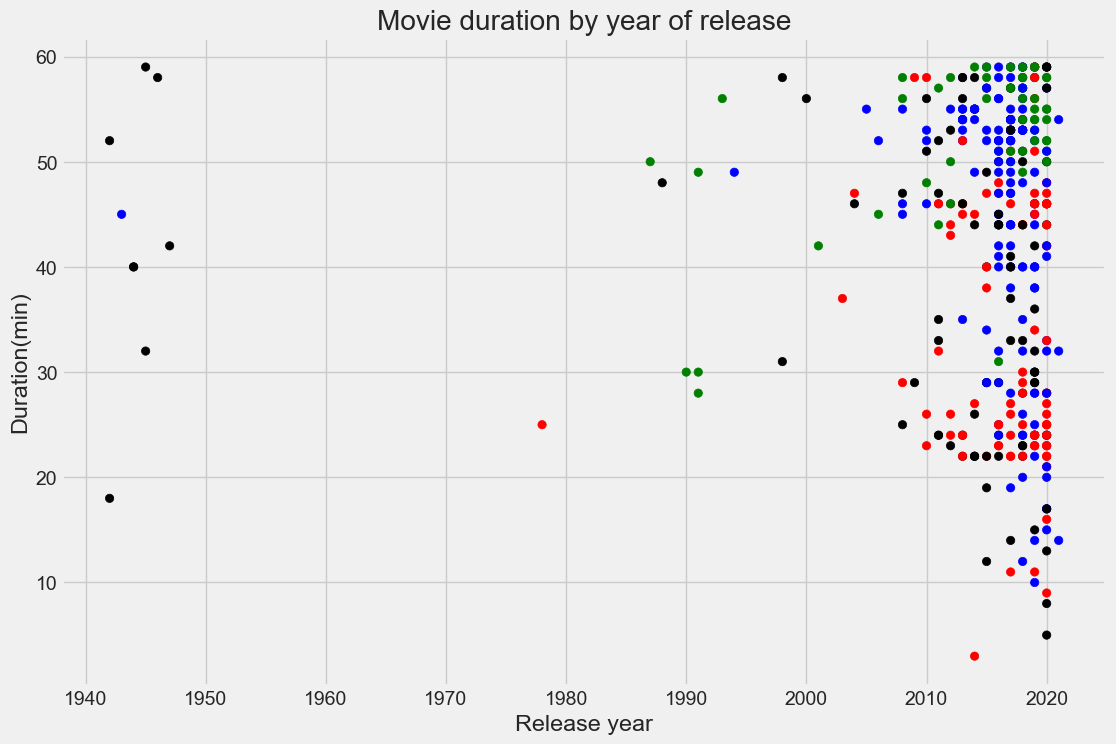

In [196]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(short_movies['release_year'], short_movies['duration'], c=colors)
plt.title("Movie duration by year of release")
plt.xlabel('Release year')
plt.ylabel('Duration(min)')
plt.show()

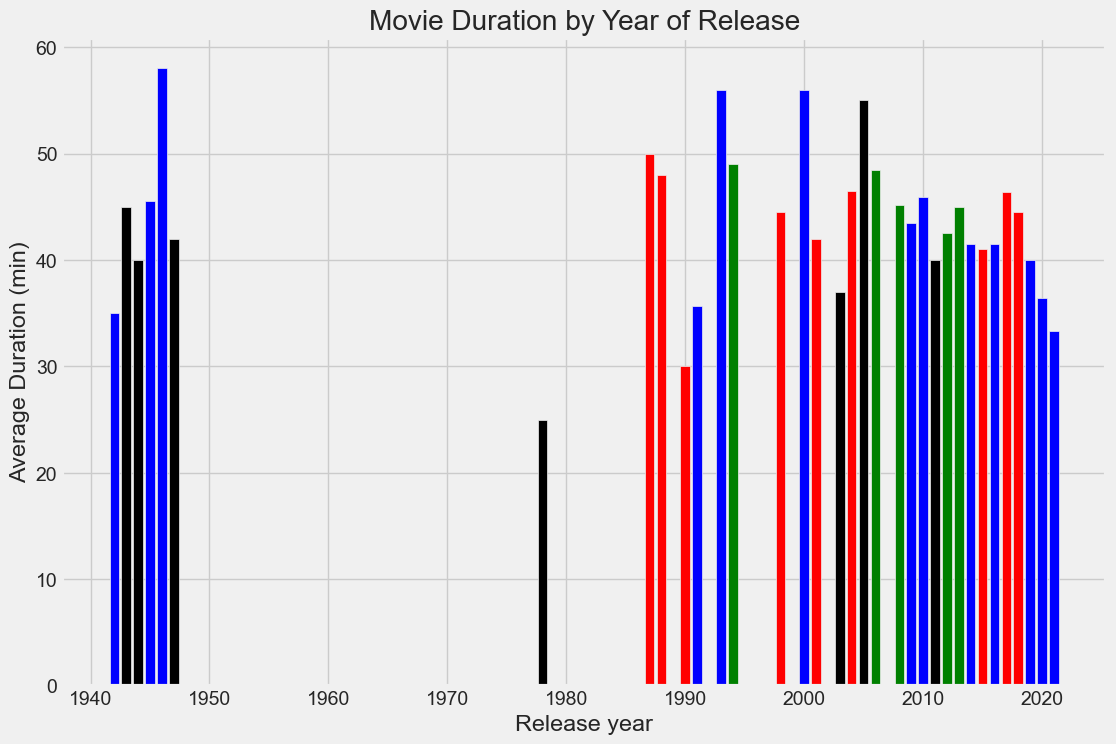

In [197]:
average_duration_by_year = short_movies.groupby('release_year')['duration'].mean()
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
ax.bar(average_duration_by_year.index, average_duration_by_year.values, color=colors)

ax.set_title("Movie Duration by Year of Release")
ax.set_xlabel('Release year')
ax.set_ylabel('Average Duration (min)')
plt.show()

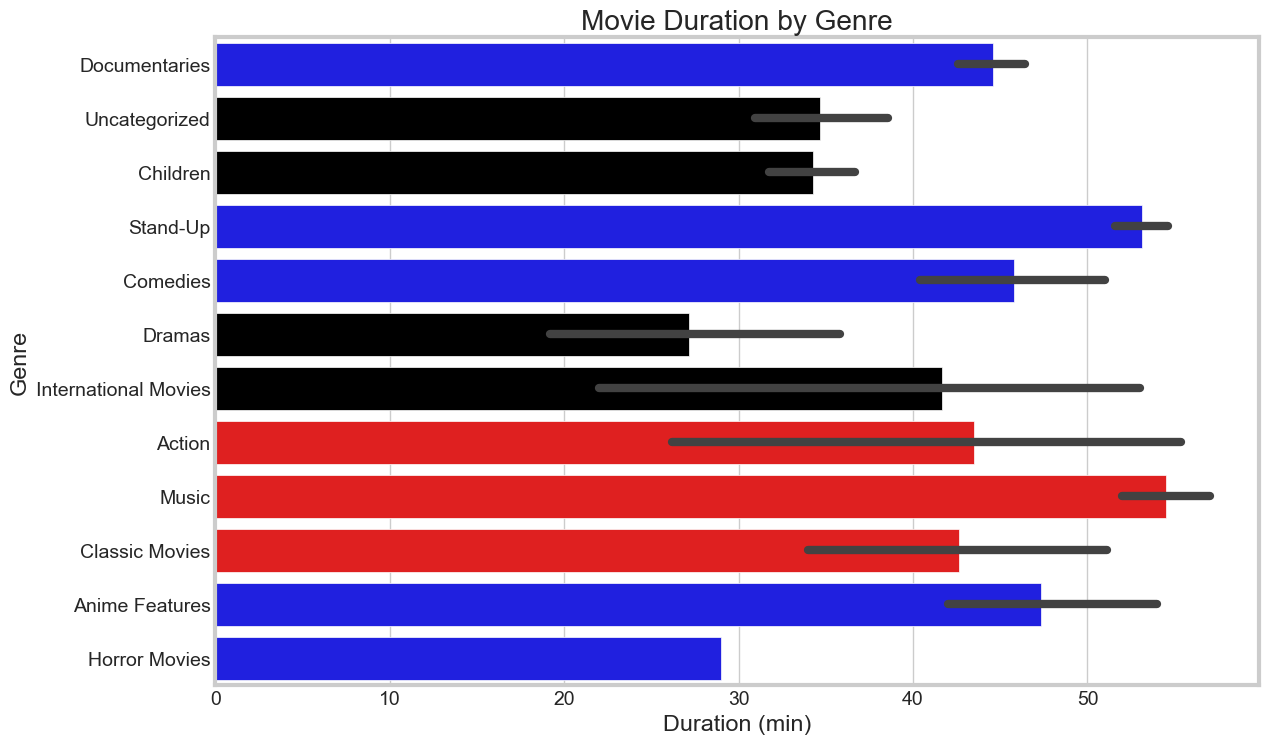

In [198]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=short_movies, x='duration', y='genre', palette=colors)
plt.title("Movie Duration by Genre")
plt.xlabel('Duration (min)')
plt.ylabel('Genre')
plt.show()

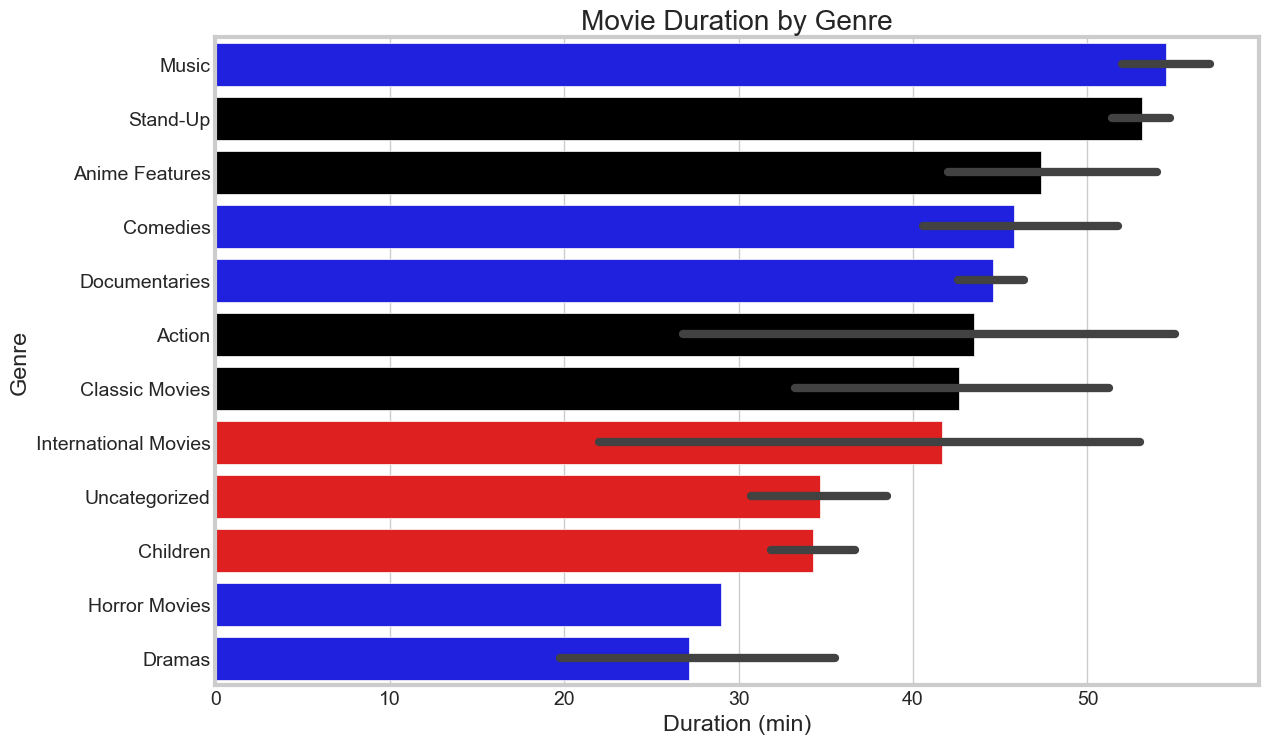

In [199]:
average_duration_by_genre = short_movies.groupby('genre')['duration'].mean().reset_index()

average_duration_by_genre = average_duration_by_genre.sort_values(by='duration', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=short_movies, x='duration', y='genre', palette=colors, order=average_duration_by_genre['genre'])

plt.title("Movie Duration by Genre")
plt.xlabel('Duration (min)')
plt.ylabel('Genre')

plt.show()

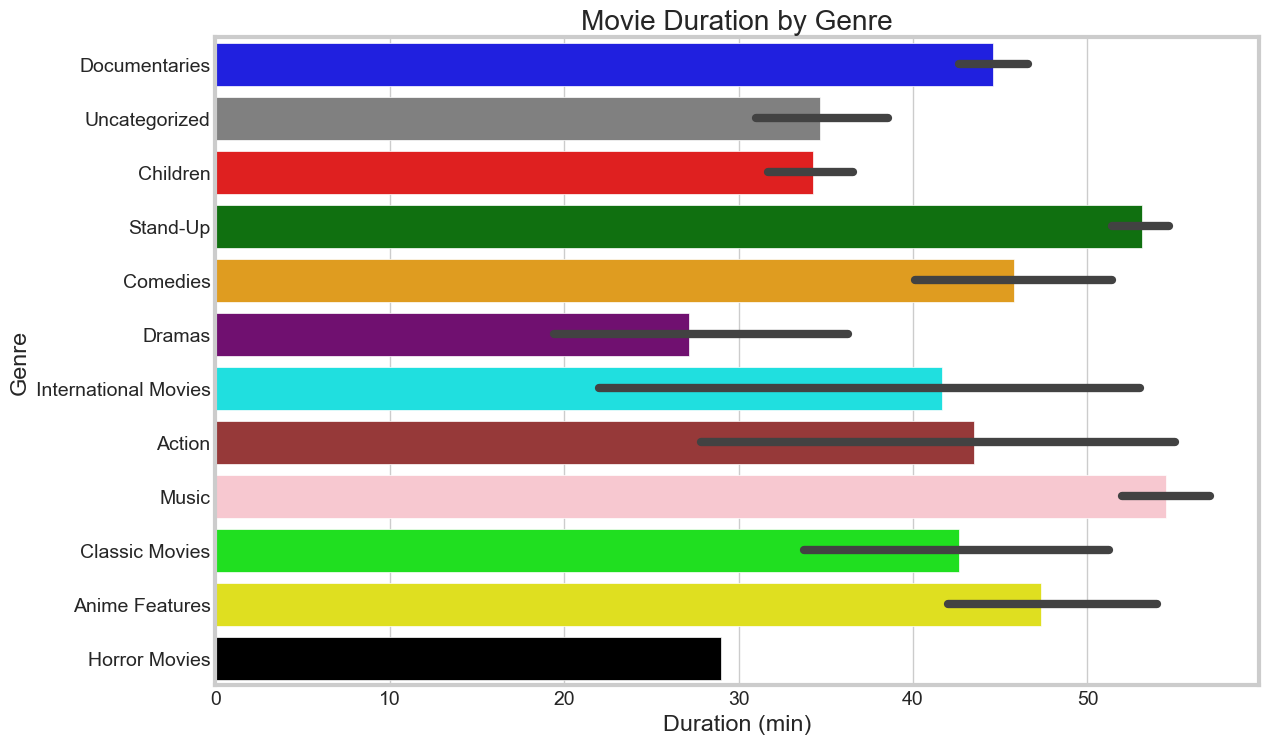

In [200]:
genre_colors = {
    'Documentaries': 'blue',
    'Uncategorized': 'gray',
    'Children': 'red',
    'Stand-Up': 'green',
    'Comedies': 'orange',
    'Dramas': 'purple',
    'International Movies': 'cyan',
    'Action': 'brown',
    'Music': 'pink',
    'Classic Movies': 'lime',
    'Anime Features': 'yellow',
    'Horror Movies': 'black'
}
colors = [genre_colors[genre] for genre in short_movies['genre']]
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=short_movies, x='duration', y='genre', palette=genre_colors,)
plt.title("Movie Duration by Genre")
plt.xlabel('Duration (min)')
plt.ylabel('Genre')
plt.show()

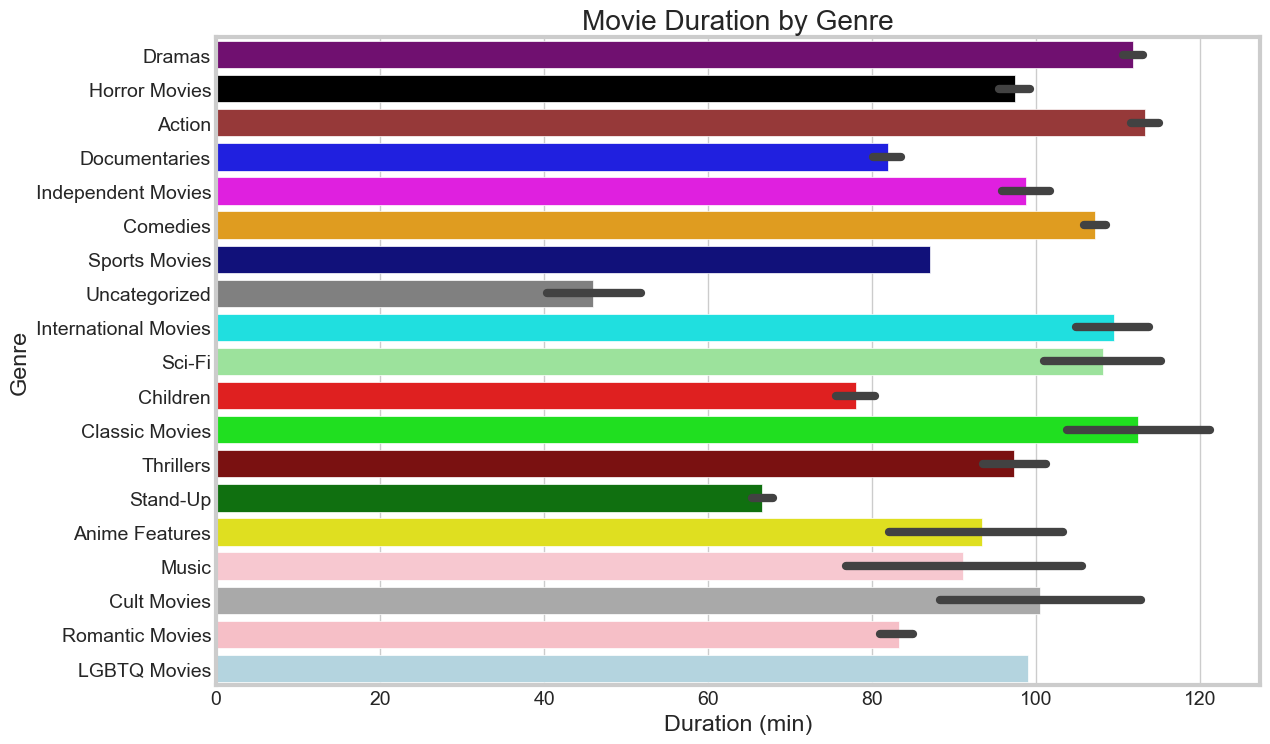

In [201]:
gen_colors = {
    'Documentaries': 'blue',
    'Uncategorized': 'gray',
    'Children': 'red',
    'Stand-Up': 'green',
    'Comedies': 'orange',
    'Dramas': 'purple',
    'International Movies': 'cyan',
    'Action': 'brown',
    'Music': 'pink',
    'Classic Movies': 'lime',
    'Anime Features': 'yellow',
    'Horror Movies': 'black',
    'Independent Movies': 'magenta',
    'LGBTQ Movies': 'lightblue', 
    'Sci-Fi': 'lightgreen',
    'Cult Movies': 'darkgray',
    'Thrillers': 'darkred',
    'Sports Movies': 'darkblue',
    'Romantic Movies': 'lightpink'
}

colors = [gen_colors.get(genre, 'black') for genre in netflix_movies['genre']]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(data=netflix_movies, x='duration', y='genre', palette=gen_colors)
plt.title("Movie Duration by Genre")
plt.xlabel('Duration (min)')
plt.ylabel('Genre')
plt.show()


In [202]:
a=netflix_movies['release_year'].unique()
print(a)

[2016 2011 2009 2008 2019 1997 2017 2018 2014 2015 2020 2010 2005 2012
 2006 2013 2000 2003 1989 2004 1977 1971 1993 2007 1998 1988 1996 2002
 1986 1990 1979 1980 1974 2001 1999 1966 1991 1982 1994 1995 1978 1992
 1972 1975 1973 1967 1960 1981 1958 1976 2021 1968 1956 1985 1965 1984
 1983 1987 1945 1946 1962 1942 1969 1955 1963 1964 1954 1970 1944 1947
 1959 1943]


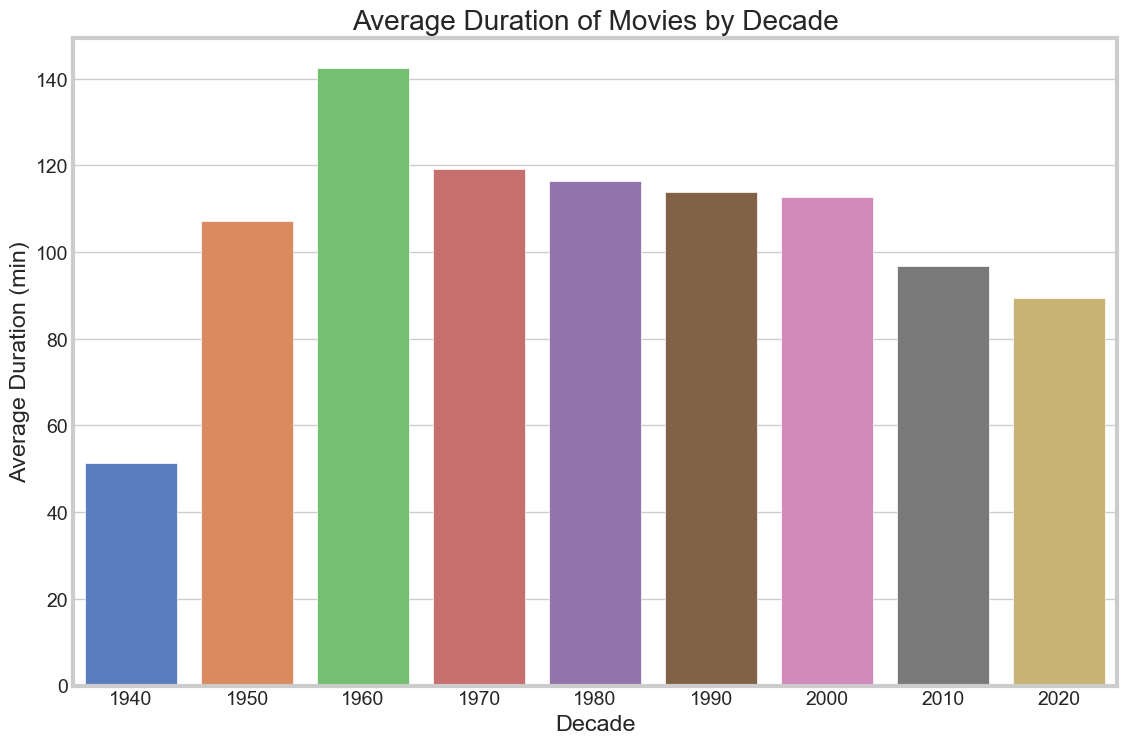

In [203]:
netflix_movies['decade'] = (netflix_movies['release_year'] // 10) * 10
average_duration_per_decade = netflix_movies.groupby('decade')['duration'].mean()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=average_duration_per_decade.index, y=average_duration_per_decade.values, palette="muted")

plt.title("Average Duration of Movies by Decade")
plt.xlabel('Decade')
plt.ylabel('Average Duration (min)')
plt.show()

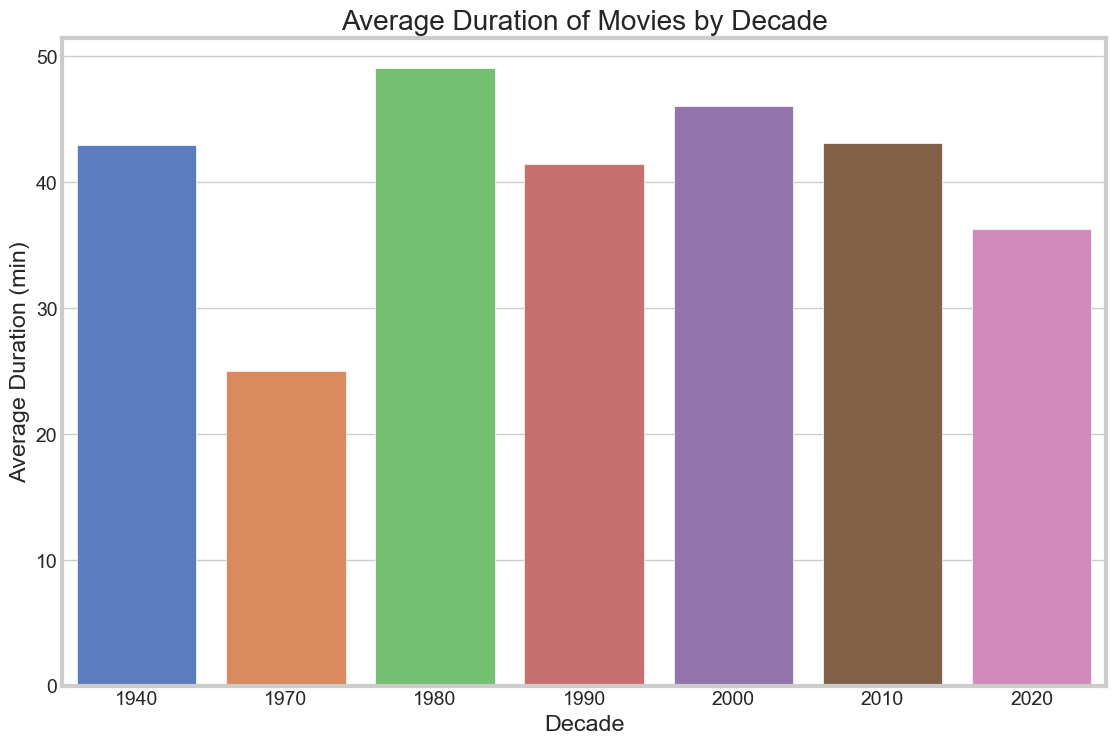

In [204]:
short_movies['decade'] = (short_movies['release_year'] // 10) * 10
average_duration_per_decade = short_movies.groupby('decade')['duration'].mean()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=average_duration_per_decade.index, y=average_duration_per_decade.values, palette="muted")

plt.title("Average Duration of Movies by Decade")
plt.xlabel('Decade')
plt.ylabel('Average Duration (min)')
plt.show()

In [205]:
print(short_movies)

                                                  title  ... decade
35                                            #Rucker50  ...   2010
55                  100 Things to do Before High School  ...   2010
67    13TH: A Conversation with Oprah Winfrey & Ava ...  ...   2010
101                                   3 Seconds Divorce  ...   2010
146                                      A 3 Minute Hug  ...   2010
...                                                 ...  ...    ...
7679                    WWII: Report from the Aleutians  ...   1940
7692  Ya no estoy aquí: Una conversación entre Guill...  ...   2020
7718                     Yoo Byung Jae: Discomfort Zone  ...   2010
7771                                               Zion  ...   2010
7784                                  Zulu Man in Japan  ...   2010

[420 rows x 6 columns]


In [206]:
answer="no"